In [193]:
import cPickle as pickle


def PlotSeries(start, stop, text,labels):
    plt.figure(figsize=(10,7))
    models = ['base_2D',]+['mod_'+ str(i) for i in range(start, stop)]
    fits = []
    ll = []

    for galprop_tag in models:
            try:
                mod = pickle.load(open('../results/FitResult_'+ galprop_tag + '.pickle','rb'))
                fits.append(mod)

            except:
                print 'Error with model', galprop_tag
                pass

    plt.subplot(221)

    for i in range(len(models)):
        try:
            fit = fits[i]
            print 'log-like, TS:', models[i], np.sum(fit['loglike']), 2*(np.sum(fits[0]['loglike'])-np.sum(fit['loglike']))
            
            
            
            ll.append(2*(np.sum(fits[0]['loglike'])-np.sum(fit['loglike'])))
            
            E, flux, stat = fit['energies'], fit['DM']['flux'], fit['DM']['fluxunc']
            model = models[i].replace('_no_secondary','').replace('_','-')

            if i==0:
                plt.errorbar(E/1e3,E**2*flux/1e3,(E**2*stat[:]/1e3,E**2*stat[:]/1e3), 
                             label=model,capthick=1, capsize=2, ls=':' )
            else:
                plt.errorbar(E/1e3,E**2*flux/1e3, 
                             label=labels[i-1],capthick=1, capsize=2, ls='-' )

        except:
            pass


    plt.legend(frameon=False, fontsize=8)
    plt.yscale('log')
    plt.xscale('log')
    plt.ylabel(r'$\rm{E^2\ dN/dE\ [GeV/cm^2/s/sr]}$')
    plt.xlabel(r'$\rm{E\ [GeV]}$')
    plt.ylim(5e-8,2e-6)


    E, f0, stat0 = fits[0]['energies'], fits[0]['DM']['flux'], fits[0]['DM']['fluxunc']

    for i in range(0,len(models)):
        try:
            plt.subplot(222)
            fit = fits[i]
            E, flux, stat = fit['energies'], fit['DM']['flux'], fit['DM']['fluxunc']
            model = models[i].replace('_no_secondary','').replace('_','-')

            plt.errorbar(E/1e3,flux/f0, label=model,capthick=1, capsize=2, ls='-' )

            #plt.yscale('log')
            plt.xscale('log')
            plt.ylim(0,2)
            plt.ylabel(r'GCE Ratio')
            plt.xlabel(r'$\rm{E\ [GeV]}$')
            #plt.legend(frameon=False, fontsize=8)

            plt.subplot(223)


            TS = -2*(np.array(fit['loglike'])-np.array(fits[0]['loglike']))
            plt.plot(E/1e3, TS)
            plt.ylabel('TS')
            #print "TS:", TS
            plt.xlabel(r'$\rm{E\ [GeV]}$')
            plt.xscale('log')
            plt.ylim(-400,50)
            
        except:
            pass
    plt.subplot(223)
    plt.text(10,-350,text)
    
    for i in range(0,len(models)):
        try:
            plt.subplot(224)
            plt.plot(range(len(labels)), ll[1:],marker='o',ls=':',color='firebrick')
            # You can specify a rotation for the tick labels in degrees or with keywords.
            plt.xticks(range(len(labels)), labels, rotation='vertical')
            plt.xlim(-.5, len(labels)-.5)
            plt.ylabel(r'$-2\ln{(\mathcal{L})}$')            
        except:
            pass
    
    
    

#plt.errorbar(E/1e3,np.ones(len(E)),yerr=(np.abs(stat0[:,0])/f0,stat0[:,1]/f0), linestyle='')

# plt.xscale('log')
# plt.ylabel(r'$\rm{Ratio\ of\ GCE\ 3FGL/2FGL}$')
# plt.xlabel(r'$\rm{E\ [GeV]}$')

# plt.savefig('/home/carlson/Dropbox/plots/GCE_sys/GCE_3fgl_vs_2fgl.pdf')

log-like, TS: base_2D -1186732.85379 0.0
log-like, TS: mod_0 -1184663.74222 -4138.22315809
log-like, TS: mod_1 -1184921.54706 -3622.61347175
log-like, TS: mod_2 -1184449.14872 -4567.41014162
log-like, TS: mod_3 -1184505.53695 -4454.6336882
log-like, TS: mod_4 -1184687.00018 -4091.70723269


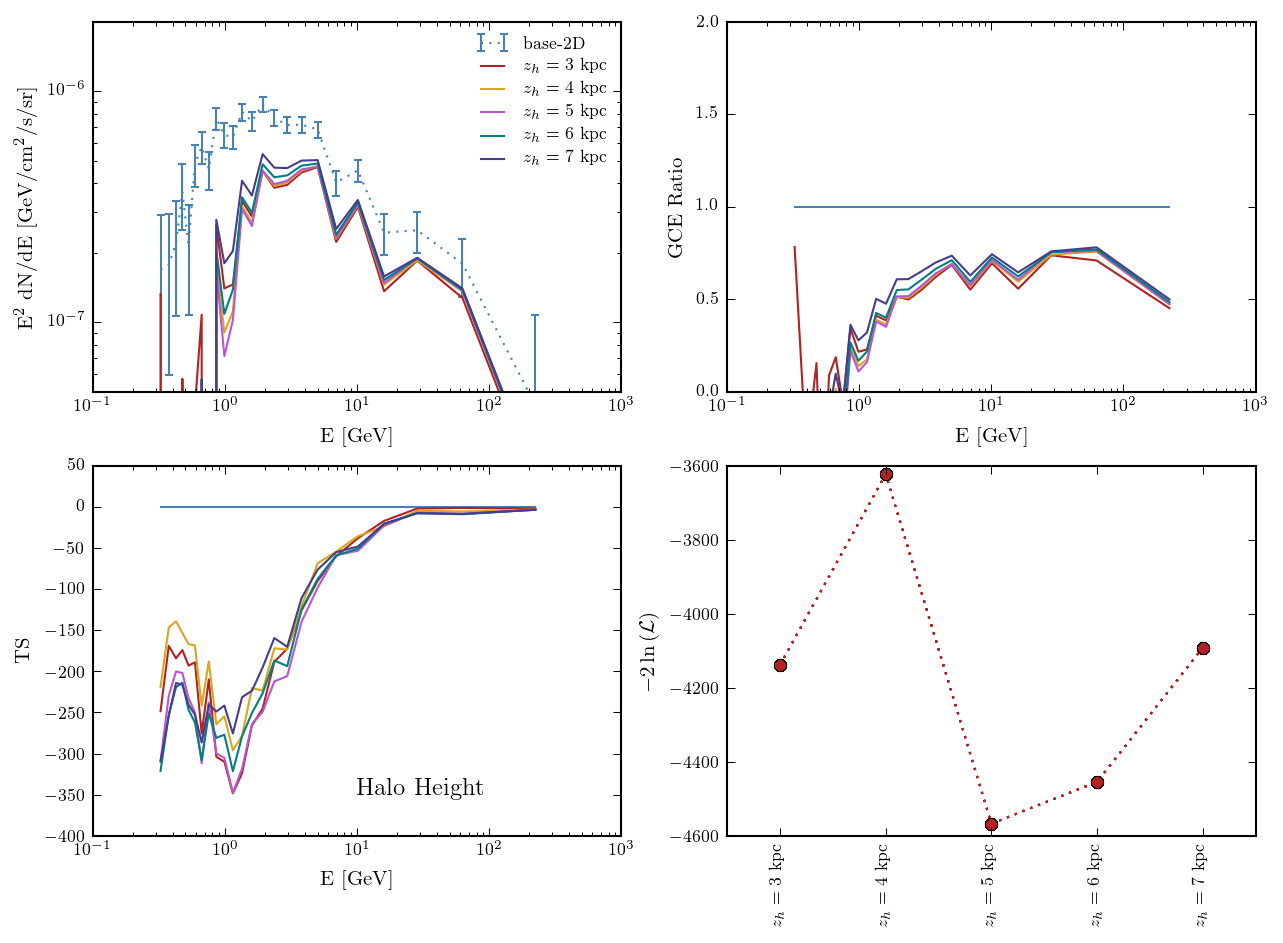

In [194]:
PlotSeries(start=0, stop=5, text='Halo Height', labels=[r'$z_h='+str(i)+'$ kpc' for i in range(3,8)])

log-like, TS: base_2D -1186732.85379 0.0
log-like, TS: mod_5 -1184505.53695 -4454.6336882
log-like, TS: mod_6 -1184630.2737 -4205.16019516
log-like, TS: mod_7 -1184171.69438 -5122.31883374
log-like, TS: mod_8 -1184719.06968 -4027.56822239


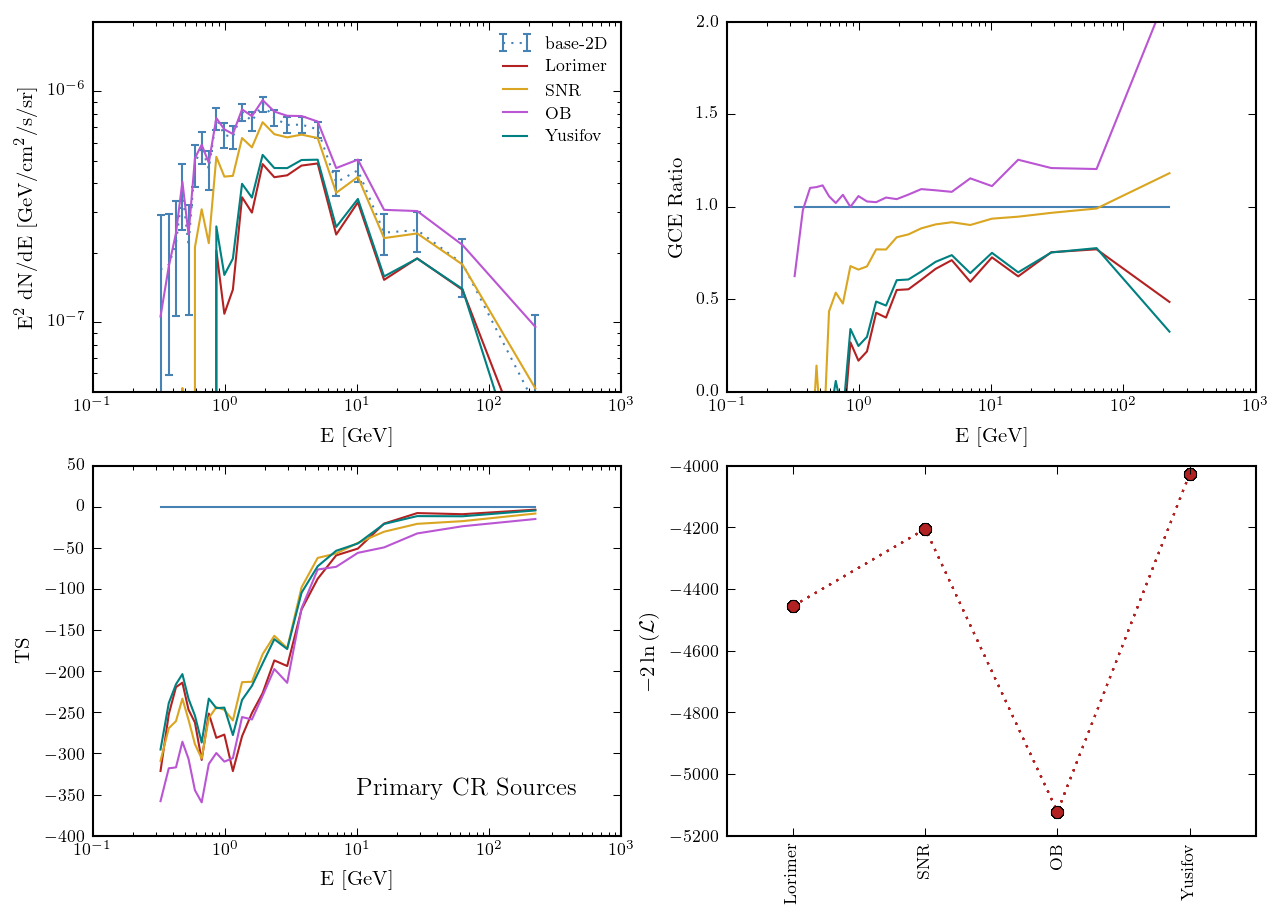

In [195]:
PlotSeries(start=5, stop=9, text='Primary CR Sources', labels=('Lorimer','SNR','OB','Yusifov'))

log-like, TS: base_2D -1186732.85379 0.0
log-like, TS: mod_9 -1184505.53695 -4454.6336882
log-like, TS: mod_10 -1183513.95269 -6437.80221339
log-like, TS: mod_11 -1185375.82411 -2714.05936948
log-like, TS: mod_12 -1184367.71998 -4730.26763658


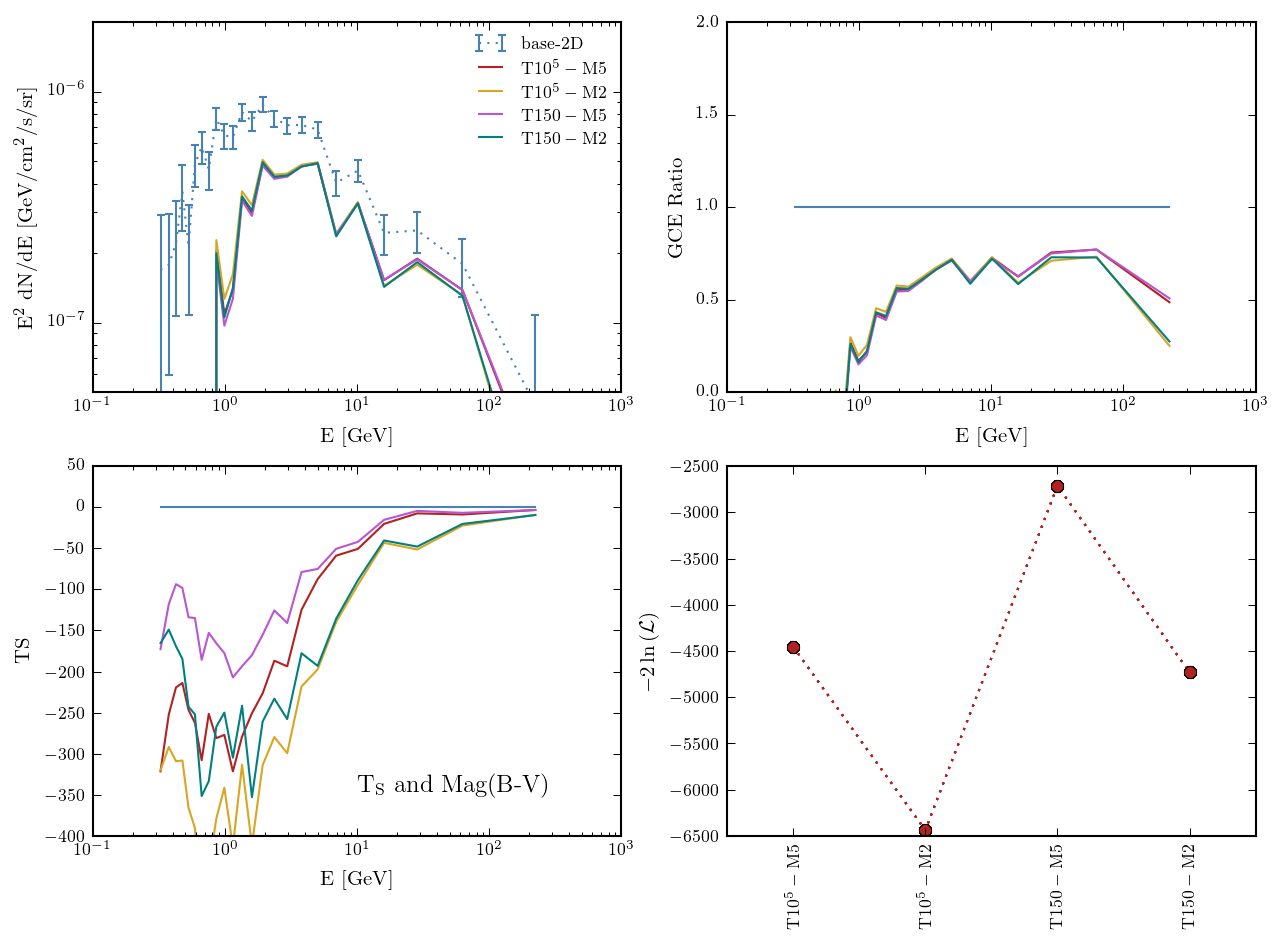

In [196]:
PlotSeries(start=9, stop=13, text=r'$\rm T_S$ and Mag(B-V)', labels=(r'$\rm T10^5-M5$',r'$\rm T10^5-M2$',r'$\rm T150-M5$',r'$\rm T150-M2$'))

log-like, TS: base_2D -1186732.85379 0.0
log-like, TS: mod_16 -1184605.68808 -4254.33143716
log-like, TS: mod_17 -1184228.79961 -5008.10837974
log-like, TS: mod_18 -1184104.21857 -5257.27044842
log-like, TS: mod_19 -1184048.19769 -5369.31220285
log-like, TS: mod_20 -1183650.17696 -6165.35367853


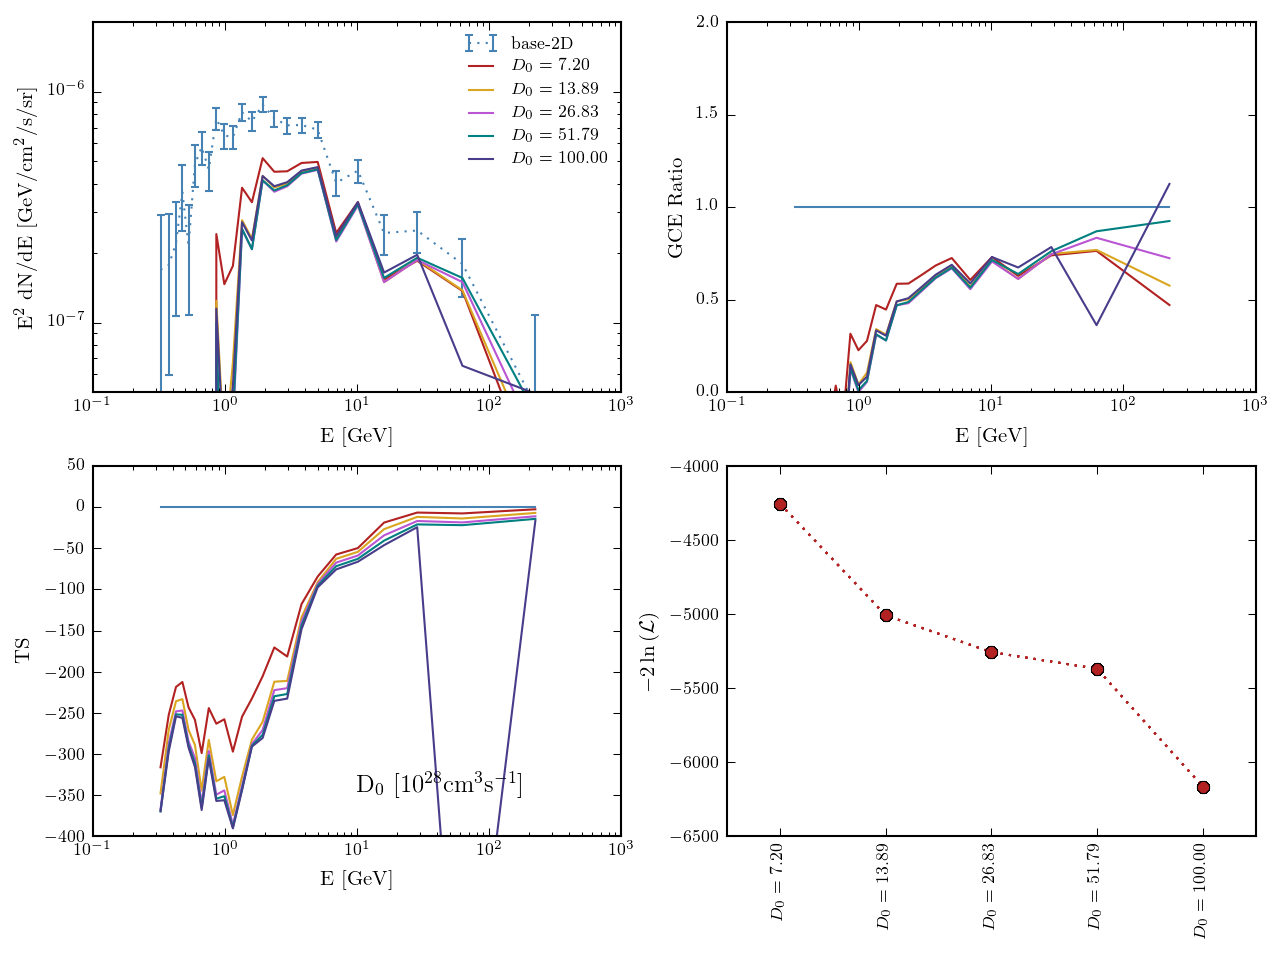

In [197]:
PlotSeries(start=16, stop=21, text=r'$\rm D_0\ [10^{28} cm^{3}s^{-1}]$', labels=['$D_0=%2.2f' % D + '$' for D in np.logspace(28,30,8)[3:]/1e28])

log-like, TS: base_2D -1186732.85379 0.0
log-like, TS: mod_21 -1184070.8304 -5324.04678415
log-like, TS: mod_22 -1184102.36046 -5260.9866777
log-like, TS: mod_23 -1184222.82915 -5020.04928585
log-like, TS: mod_24 -1184445.2271 -4575.25338205
log-like, TS: mod_25 -1176528.91974 -20407.8681129


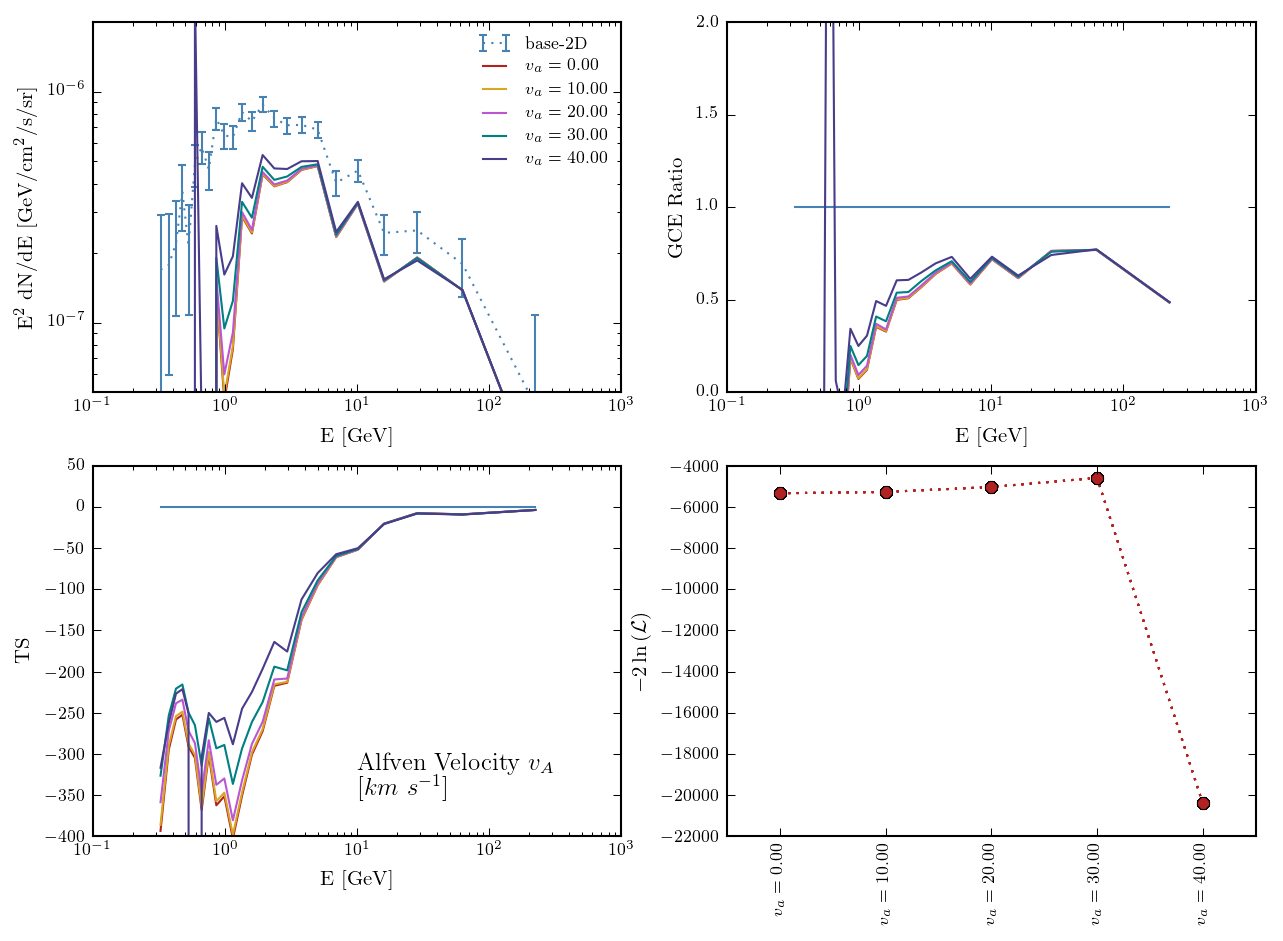

In [198]:
PlotSeries(start=21, stop=26, text=r'\noindent Alfven Velocity $v_A $\newline $[km\ s^{-1}]$', labels=['$v_a=%2.2f' % v + '$' for v in np.linspace(0,50,6)[:-1]])

log-like, TS: base_2D -1186732.85379 0.0
log-like, TS: mod_27 -1184505.53695 -4454.6336882
log-like, TS: mod_28 -1182600.32042 -8265.06674506
log-like, TS: mod_29 -1181776.76858 -9912.17043666
log-like, TS: mod_30 -1181275.9963 -10913.7149916
log-like, TS: mod_31 -1180928.86145 -11607.9846814
log-like, TS: mod_32 -1180667.1365 -12131.434591


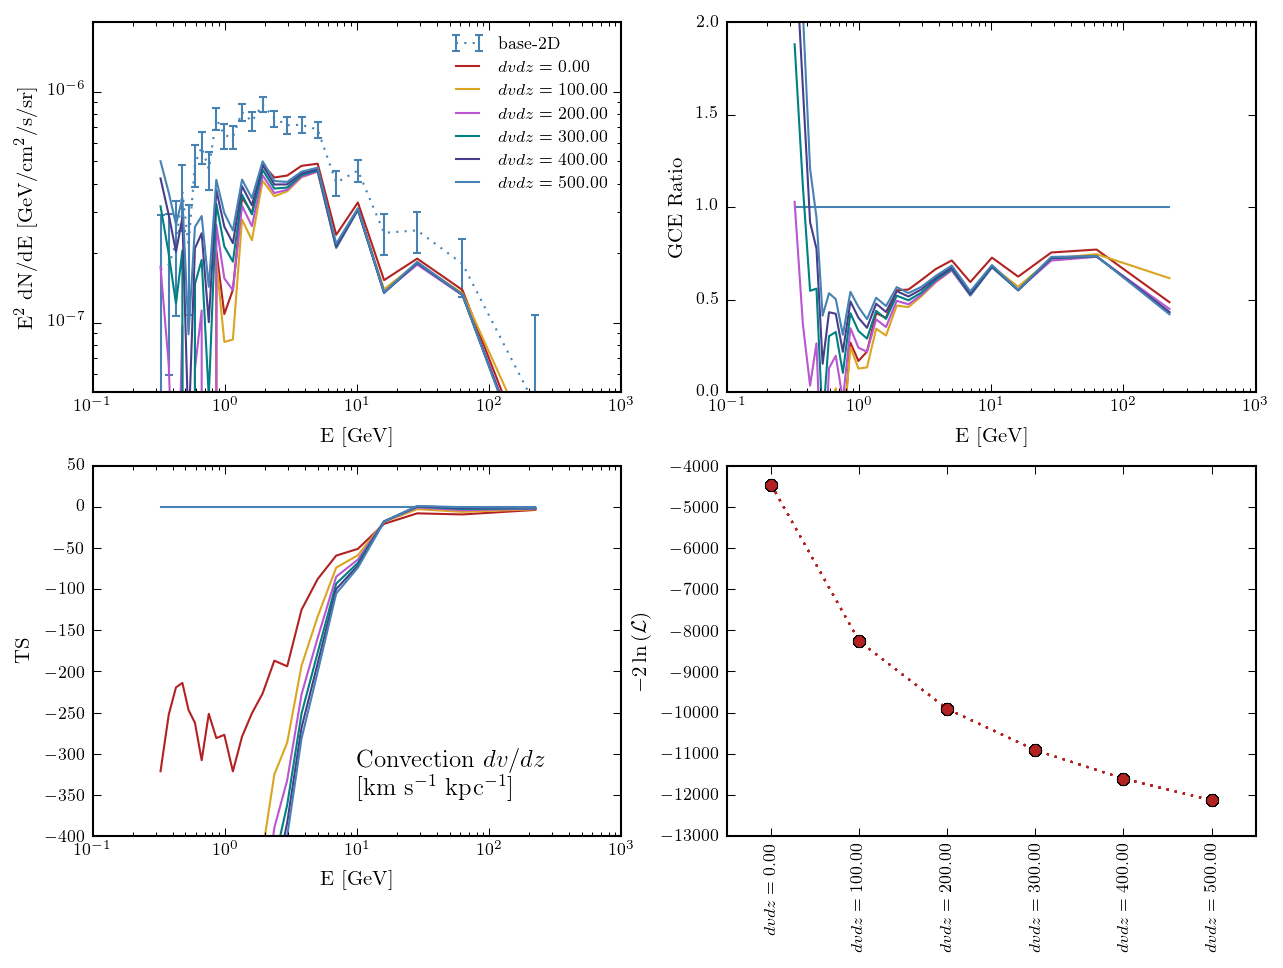

In [199]:
PlotSeries(start=27, stop=33, text=r'\noindent Convection $dv/dz$\newline $\rm [km\ s^{-1}\ kpc^{-1}]$', labels=['$dvdz=%2.2f' % v + '$' for v in np.linspace(0,500,6)])

Error with model mod_40
log-like, TS: base_2D -1186732.85379 0.0
log-like, TS: mod_33 -1184505.53695 -4454.6336882
log-like, TS: mod_34 -1184505.53695 -4454.6336882
log-like, TS: mod_35 -1184505.53695 -4454.6336882
log-like, TS: mod_36 -1184505.53695 -4454.6336882
log-like, TS: mod_37 -1184505.53695 -4454.6336882
log-like, TS: mod_38 -1184505.53695 -4454.6336882
log-like, TS: mod_39 -1184505.53695 -4454.6336882


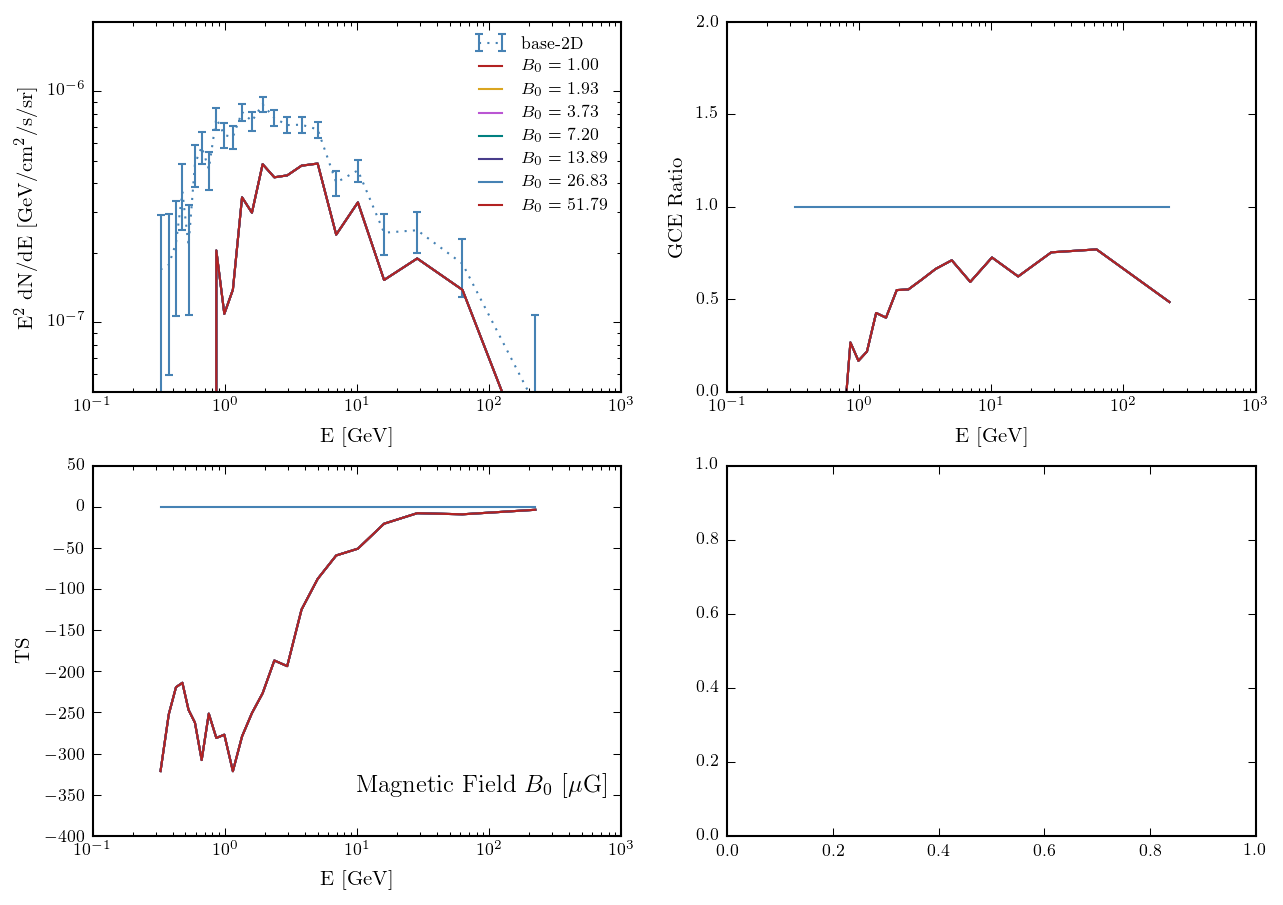

In [200]:
PlotSeries(start=33, stop=41, text=r'\noindent Magnetic Field $B_0\ \rm{[\mu G]}$', labels=['$B_0=%2.2f' % v + '$' for v in np.logspace(0,2,8)])

log-like, TS: base_2D -1186732.85379 0.0
log-like, TS: mod_41 -1180855.30482 -11755.0979562
log-like, TS: mod_42 -1180855.30482 -11755.0979562
log-like, TS: mod_43 -1180855.30482 -11755.0979562
log-like, TS: mod_44 -1180855.30482 -11755.0979562
log-like, TS: mod_45 -1180855.30482 -11755.0979562
log-like, TS: mod_46 -1184505.53695 -4454.6336882


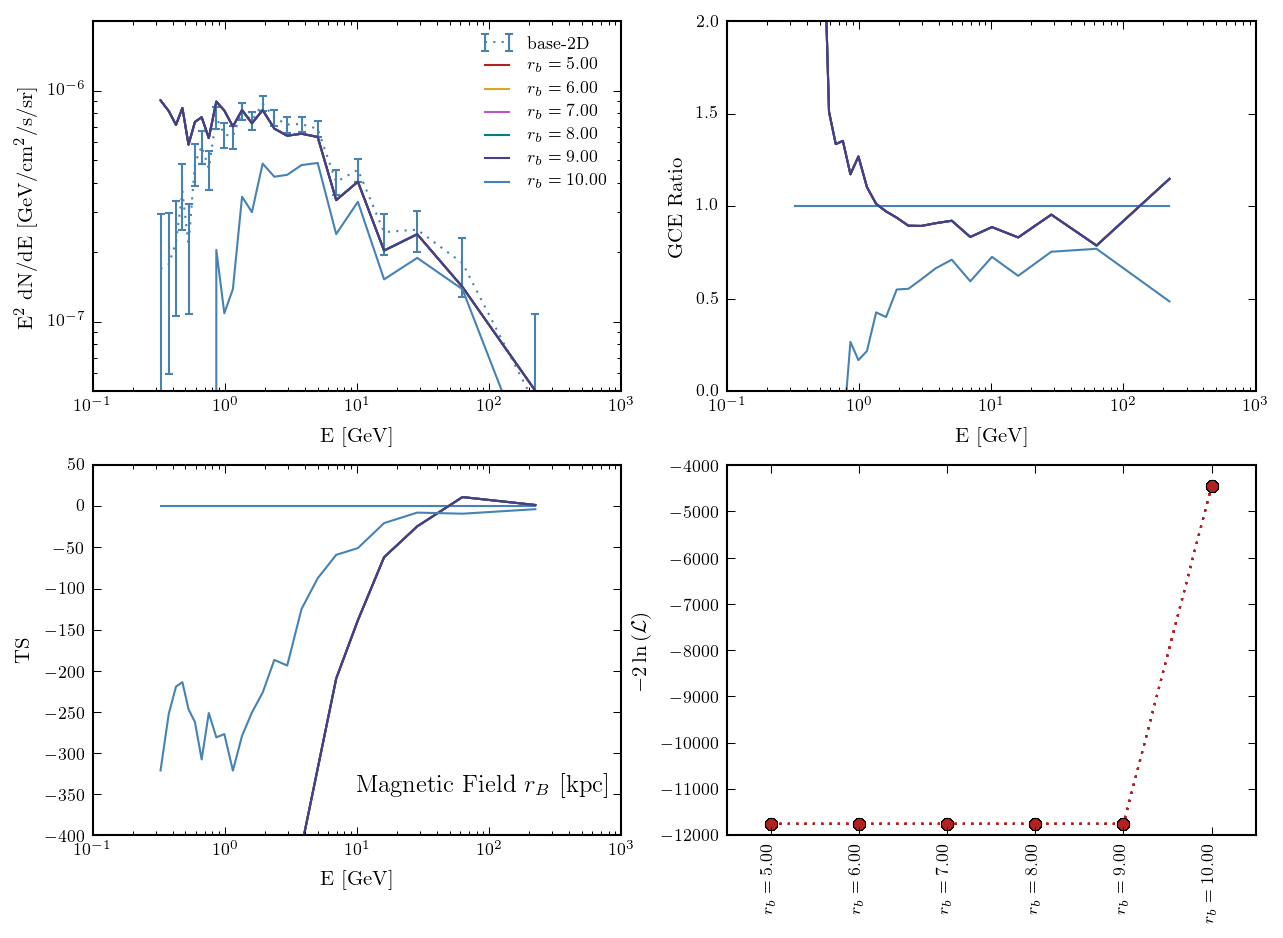

In [201]:
PlotSeries(start=41, stop=47, text=r'\noindent Magnetic Field $r_B$ $\rm [kpc]$', labels=['$r_b=%2.2f' % v + '$' for v in np.linspace(5,10,6)])

log-like, TS: base_2D -1186732.85379 0.0
log-like, TS: mod_47 -1184505.53695 -4454.6336882
log-like, TS: mod_48 -1184505.53695 -4454.6336882
log-like, TS: mod_49 -1184505.53695 -4454.6336882
log-like, TS: mod_50 -1184505.53695 -4454.6336882
log-like, TS: mod_51 -1184505.53695 -4454.6336882
log-like, TS: mod_52 -1184505.53695 -4454.6336882


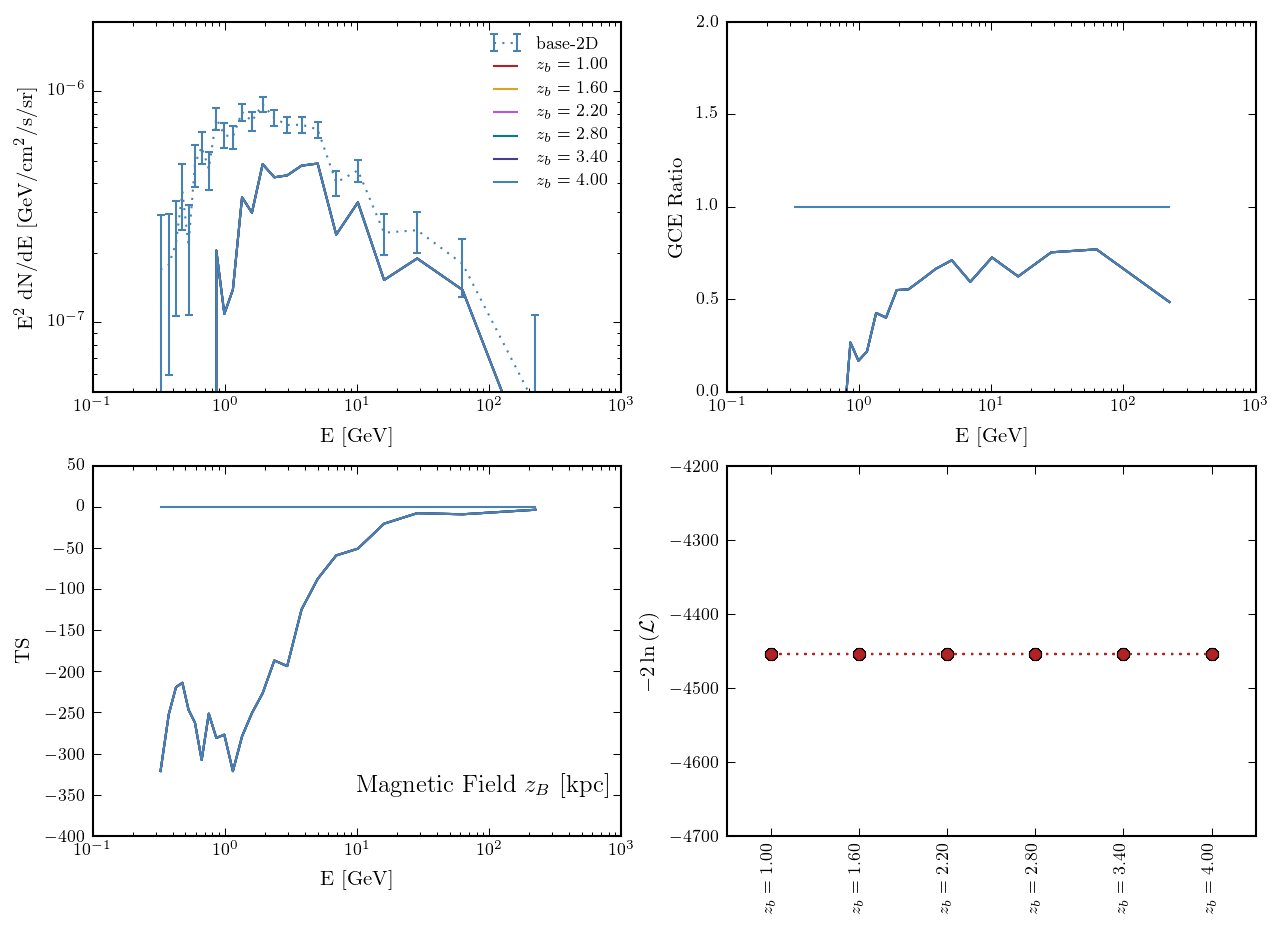

In [202]:
PlotSeries(start=47, stop=53, text=r'\noindent Magnetic Field $z_B$ $\rm [kpc]$', labels=['$z_b=%2.2f' % v + '$' for v in np.linspace(1,4,6)])

log-like, TS: base_2D -1186732.85379 0.0
log-like, TS: mod_53 -1184505.53695 -4454.6336882
log-like, TS: mod_54 -1184505.53695 -4454.6336882
log-like, TS: mod_55 -1184505.53695 -4454.6336882
log-like, TS: mod_56 -1184505.53695 -4454.6336882
log-like, TS: mod_57 -1184505.53695 -4454.6336882
log-like, TS: mod_58 -1184505.53695 -4454.6336882


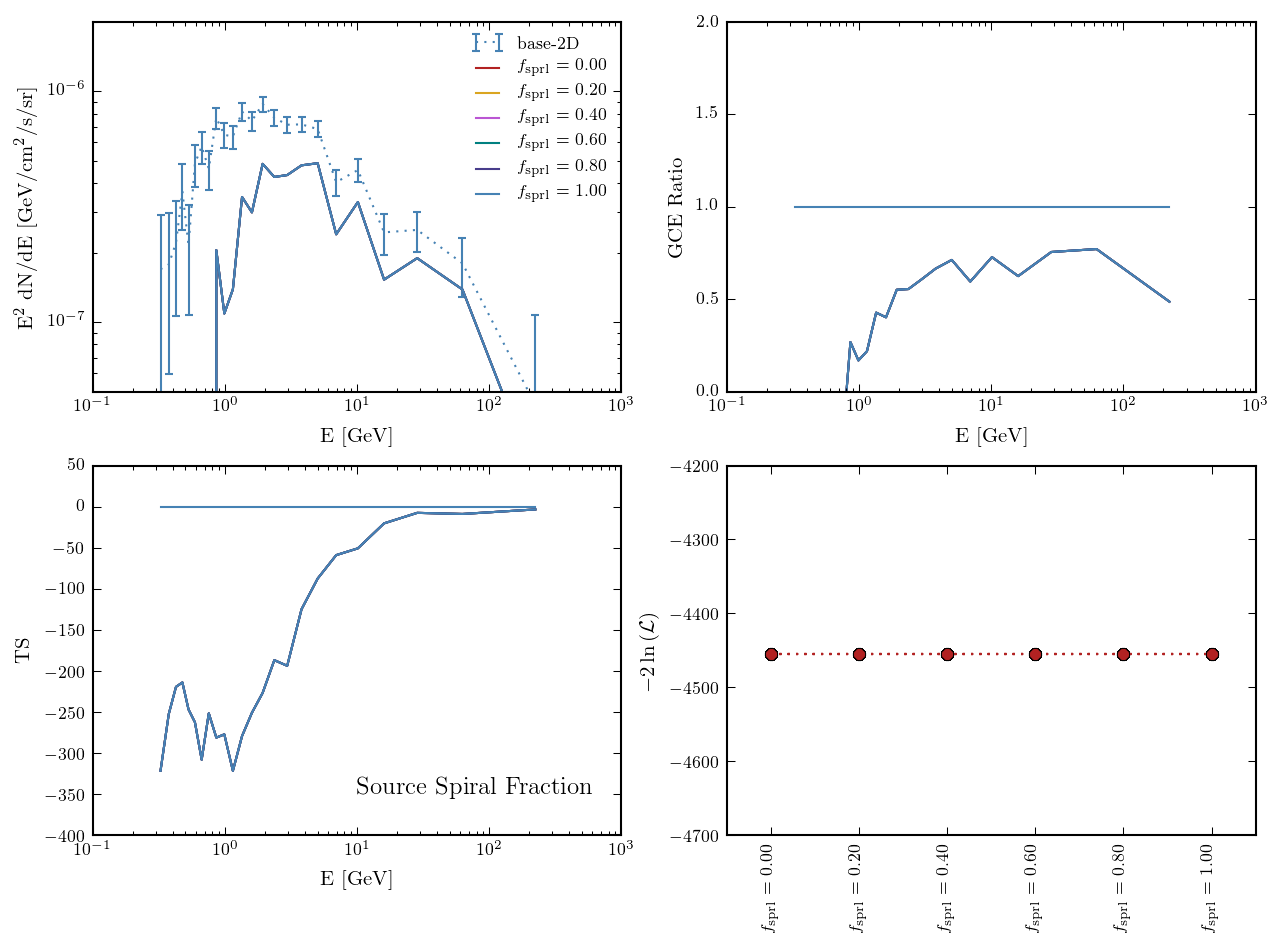

In [203]:
PlotSeries(start=53, stop=59, text=r'\noindent Source Spiral Fraction$', labels=[r'$f_{\rm sprl}=%2.2f' % v + '$' for v in np.linspace(0,1,6)])

In [205]:
np.linspace(2,7,11)

array([ 2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,  6. ,  6.5,  7. ])